# *Image Processing*

## Histogrammes

Les *Histogrammes* sont des représentations graphiques d'images, ils affichent la *quantités* de pixels pour chaque *valeurs d'intensités* de 0(noir) à 255(blanc)  

On peut les utlisers pour Seuiller des images en binaires, pour modifer le contraste et la luminosité, pour égaliser une image..  

Avec Matplotlib on peut créés des *Histogrammes* avec:  
*`plt.hist(image.ravel(), bins=256)`*  
- le param *`bins=256`* car la valeur des pixels doit être définie entre 0 et 255
- On utilise *`.ravel()`* pour renvoyer un array(tableau) des images aplati(flattened) qui puissent être mis dans un graphm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot

In [3]:
%matplotlib inline

- Notre image

In [5]:
img = plt.imread('data/pmz1.jpg')

- checking size and number of Channels, here 3 for RGB, RedGreenBlue

In [65]:
img.shape

(900, 900, 3)

In [67]:
# nb de pixel
img.size

2430000

- fonction pour afficher les images, utlise Matplotlib

In [21]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

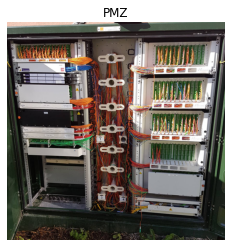

In [41]:
show_image(img, 'PMZ')

## Couleurs

Voici quelques couleurs communes envoyé en tant que *`tuples`*
RGB :
- Noir : (0,0,0)
- Blanc : (255 255 255)
- Rouge : (255,0,0)
- Vert : (0,255,0)
- Bleu : (0,0255)
- Aqua : (0,255,255)
- Fuchsia : (255,0,255)
- Marron : (128,0,0)
- Marine : (0,0,128)
- Olive : (128,128,0)
- Violet : (128,0,128)
- Sarcelle : (0,128,128)

### RedGreenBlue separation avec Numpy 

Utilisons *`.hist()`* pour afficher sur un graph les 256 nuances de Rouge, Vert et Bleu.  
Avec `*.ravel()`* pour mettre ces valeurs de couleurs dans un *array* d'une seul dimension.

In [42]:
from skimage import color

In [99]:
import skimage.io as io
from copy import deepcopy

In [116]:
red = deepcopy(img)

In [117]:
red[:,:,1]=0
red[:,:,2]=0

In [103]:
green = deepcopy(img)
green[:,:,0]=0
green[:,:,2]=0

In [108]:
blue = deepcopy(img)
blue[:,:,0]=0
blue[:,:,1]=0

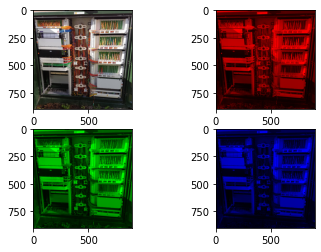

In [119]:
fig, ax=plt.subplots(2,2)
ax[0,0].imshow(img)
ax[0,1].imshow(red)
ax[1,0].imshow(green)
ax[1,1].imshow(blue)

plt.show()

***

### Histogrammes de couleurs

In [123]:
R=img[:,:,0]
G=img[:,:,1]
B=img[:,:,2]

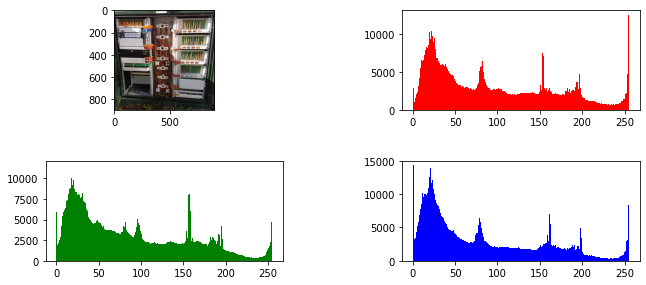

In [124]:
# Plot the red histogram with bins in a range of 256
plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.hist(R.ravel(), bins=256, color='red')

plt.subplot(2,2,3)
plt.hist(G.ravel(), bins=256, color='green')

plt.subplot(2,2,4)
plt.hist(B.ravel(), bins=256, color='blue')

plt.subplots_adjust(wspace=0.50, bottom=0.01, hspace=0.5, right=1.5)
plt.show()

## Filtrer, Threshold
***Filtre et Seuils***

- *`try_all_threshold()`* pour essayer la plus part des filtres d'un coup

In [1]:
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage import color

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


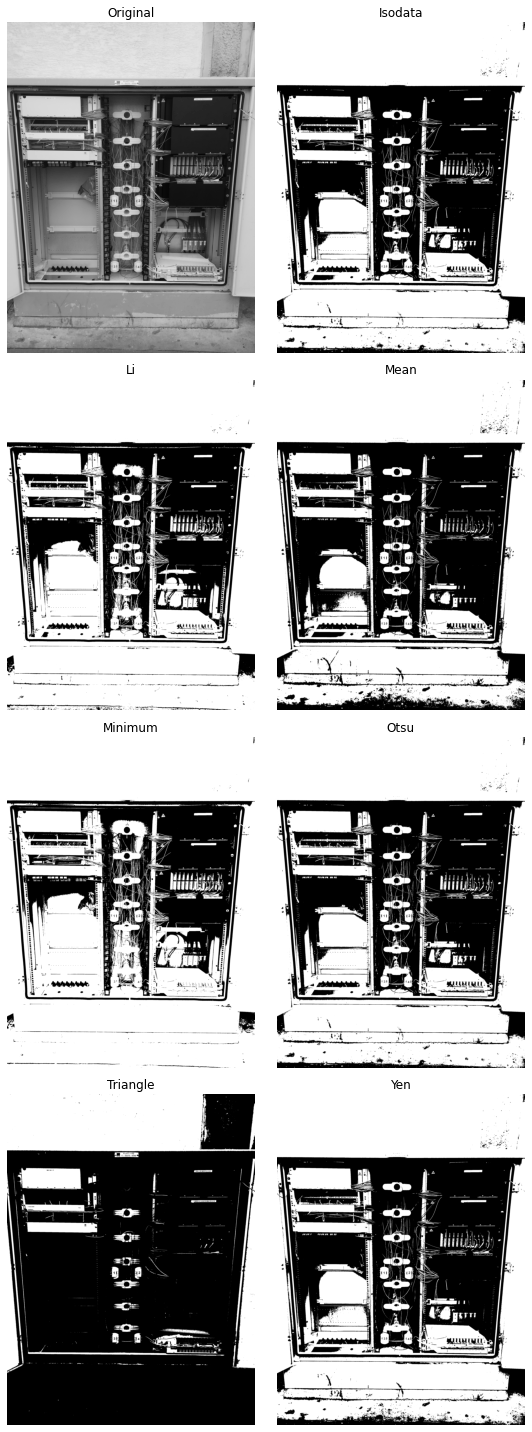

In [10]:
# Turn the fruits image to grayscale
grayscale = color.rgb2gray(img)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose=True, figsize=(8, 20))

# Show the resulting plots
plt.show(fig, ax)

### Trouver le Threshold optimal

avec threshold_otsu()

In [15]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

In [16]:
# Turn the image grayscale
gray_img = rgb2gray(img)

In [19]:
# Obtain the optimal threshold value
thresh = threshold_otsu(gray_img)
# Apply thresholding to the image
binary_global = gray_img > thresh

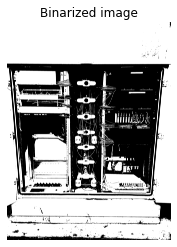

In [23]:
show_image(binary_global, 'Binarized image')

## Color Filtering Videos
- **RED**


In [24]:
### NOT WORKING ON NOTEBOOK BEACAUSE OF cv2.imshow(), use with vscode

In [8]:
cap = cv2.VideoCapture(0)

while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

In [7]:
dark_red  = np.uint8([[[12,22,121]]])
dark_red = cv2.cvtColor(dark_red,cv2.COLOR_BGR2HSV)